## *******************************recommedar system***************************

In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

In [4]:
movie = 10
user = 5

In [10]:
matr = np.random.randint(10,size=(10,5)) ## 10 is the range all value will fro 0-9 
matr

array([[3, 2, 0, 2, 4],
       [8, 7, 1, 3, 6],
       [7, 7, 9, 2, 2],
       [1, 0, 7, 4, 0],
       [1, 5, 1, 4, 1],
       [4, 7, 6, 6, 7],
       [2, 3, 0, 0, 1],
       [1, 2, 0, 9, 8],
       [3, 1, 2, 1, 5],
       [4, 6, 3, 3, 3]])

In [11]:
colvect = np.random.randint(10,size=(10,1))  ## will crate a matrix with 10 row and 1 column value rangind upto 10-1
colvect

array([[7],
       [5],
       [0],
       [4],
       [3],
       [3],
       [3],
       [1],
       [1],
       [9]])

In [13]:
matr[:,0:1] ## to get al  wors and 1 column in matrix form

array([[3],
       [8],
       [7],
       [1],
       [1],
       [4],
       [2],
       [1],
       [3],
       [4]])

In [14]:
## to get all column and first rwo
matr[0:1,:]

array([[3, 2, 0, 2, 4]])

In [17]:
## to get all column and second row
matr[0:2,:]

array([[3, 2, 0, 2, 4],
       [8, 7, 1, 3, 6]])

In [23]:
## all element at 0,2,6 and col=1
matr[[0,2,6],1]

array([2, 7, 3])

In [26]:
## movie rating
rating = np.random.randint(11,size=(10,5))
rating

array([[ 8,  9,  9,  4,  1],
       [ 2,  0,  1,  8,  1],
       [ 5,  3,  9,  3,  2],
       [ 3,  0, 10,  4,  9],
       [ 4,  2,  7,  3,  0],
       [ 2,  2,  1,  5,  5],
       [ 7,  9,  4,  3,  3],
       [ 8,  9,  0,  5,  0],
       [ 3, 10,  6,  5,  7],
       [ 2, 10,  0,  5,  8]])

In [28]:
## craeting enw matrix from rating where raint g is non zero
did_rate = (rating!=0)*1
print(did_rate)

[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]
 [1 1 0 1 1]]


In [36]:
pip.main(['install','sqlalchemy'])

Exception:
Traceback (most recent call last):
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\commands\install.py", line 335, in run
    wb.build(autobuilding=True)
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\req\req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\req\req_set.py", line 554, in _prepare_file
    require_hashes
  File "C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\req\req_install.py", line 278, in populate_link
    self.link = finder.find_req

2

## Movie lens darabase ####

### movie recomendatio nsystemof simlilear movie for a given movie based on user rating ####

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
movie = pd.read_csv("C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\ml-latest-small\\movies.csv",header=0)
rating = pd.read_csv("C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\ml-latest-small\\ratings.csv",header=0)

In [3]:
movie.iloc[30]

movieId                        31
title      Dangerous Minds (1995)
genres                      Drama
Name: 30, dtype: object

In [4]:
rating.drop('timestamp',inplace=True,axis=1)
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
## combilen two dataframe and replce name with helkp of movieid of other df
result = pd.merge(rating,movie[['title','genres','movieId']],on='movieId')

In [6]:
result.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


In [7]:
result.drop(['movieId','genres'],inplace=True,axis=1)
result.head()

,userId,rating,title
0,1,2.5,Dangerous Minds (1995)
1,7,3.0,Dangerous Minds (1995)
2,31,4.0,Dangerous Minds (1995)
3,32,4.0,Dangerous Minds (1995)
4,36,3.0,Dangerous Minds (1995)


In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 3 columns):
userId    100004 non-null int64
rating    100004 non-null float64
title     100004 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [9]:
## content based filtering we want to recomed similiear movie when user goes to a movie
## sdo we wioluld like to get movies similiearity
## so we would want   a matrix of user in rows  and moveis in columns
## so pivoting the result df
Matrix = result.pivot_table(index='userId',columns='title',values='rating')
Matrix.head(20)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## replace NaN with 0
Matrix.replace(np.NaN,0,inplace=True)
Matrix.head(20)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
##pd.DataFrame.to_csv(Matrix[['Clerks (1994)','Mallrats (1995)']])
Matrix[['Clerks (1994)','Mallrats (1995)']].to_csv('mov.csv')

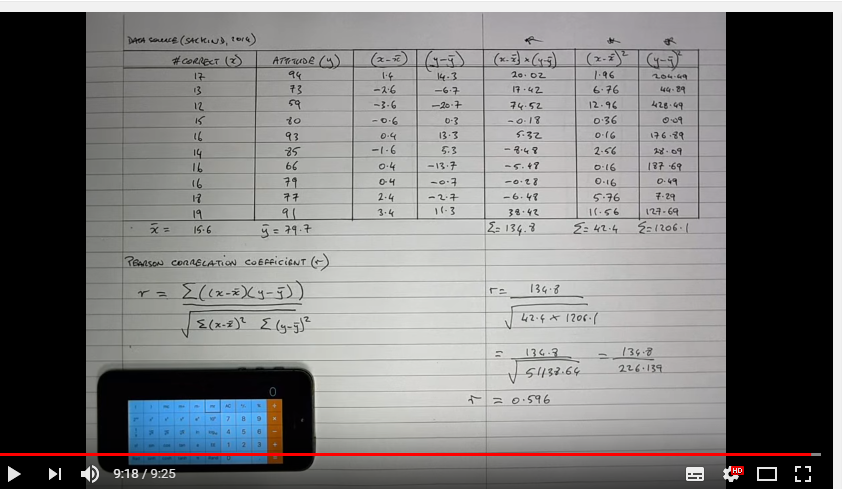

In [12]:
Image(filename="pearson_core_(r).png", width=700,height=400)

In [11]:
def cal_r(s1,s2):
    x_mean = s1.sum()/s1.shape[0]
    y_mean = s2.sum()/s2.shape[0]
    x_xbar = s1-x_mean
    y_ybar = s2-y_mean
    ##print(s1.sum(),x_mean,s2.sum(),y_mean)
   ## print(x_xbar,y_ybar)
    mul = x_xbar * y_ybar
    num= sum(mul)
    sqr1= np.square(x_xbar)
    sqr2= np.square(y_ybar)
    ##print(sqr1,sqr2)
    sqr1_sum = sum(sqr1)
    sqr2_sum = sum(sqr2)
    ##print(num,sqr1_sum,sqr2_sum)
    r = num/(np.sqrt((sqr1_sum)*(sqr2_sum)))
    return round(r,3)

In [12]:
cal_r(Matrix['Clerks (1994)'],Matrix['"Great Performances" Cats (1998)'])

-0.019

In [13]:
Matrix.columns[Matrix.columns.get_loc('"Great Performances" Cats (1998)')]

'"Great Performances" Cats (1998)'

In [14]:
Matrix.duplicated().sum()

0

In [16]:
if(Matrix.columns[0]=='Clerks (1994)'):
    print('h')

In [117]:
def top10recom(MovieName):
    r = []
    movie = []
    for i in Matrix.columns:
        if(Matrix.columns[Matrix.columns.get_loc(i)]==MovieName):
            continue
        r.append(cal_r(Matrix[MovieName],Matrix[i]))
        movie.append(Matrix.columns[Matrix.columns.get_loc(i)])        
    dic = {'Movie':movie,'Relation':r}
    df = pd.DataFrame(dic)    
    df.sort_values(['Relation'],ascending=False,inplace=True)
    return df[0:20]
    

In [118]:
%timeit
## will retrun top 20 movie for a movie based on user rating 
print(top10recom('Clerks (1994)'))

                                            Movie  Relation
4976                              Mallrats (1995)     0.487
1215                   Breakfast Club, The (1985)     0.407
1546                           Chasing Amy (1997)     0.407
7370  South Park: Bigger, Longer and Uncut (1999)     0.387
2448                               Ed Wood (1994)     0.381
7380                            Spaceballs (1987)     0.377
8670                         Wayne's World (1992)     0.372
1901                             Crow, The (1994)     0.364
937                      Big Lebowski, The (1998)     0.360
5576                  Natural Born Killers (1994)     0.354
1677                             Clerks II (2006)     0.352
4206        Jay and Silent Bob Strike Back (2001)     0.350
8489                   Usual Suspects, The (1995)     0.343
5674       Nightmare Before Christmas, The (1993)     0.342
530                       Army of Darkness (1993)     0.341
6587                        Reservoir Do

## movie recommendatio n based on plot of a movie ##

In [3]:
metaData = pd.read_csv("C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\the-movies-dataset\\movies_metadata.csv",usecols=['original_title','overview'],header=0)

In [4]:
metaData.head()

,original_title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [5]:
metaData.shape

(45466, 2)

In [6]:
## initializinf tf-idf  term-frequen ey inverse doc ument frequercy
tfidf = TfidfVectorizer(stop_words='english')

In [7]:
metaData.isnull().sum()

original_title      0
overview          954
dtype: int64

In [8]:
## filling na
metaData['overview'] = metaData['overview'].fillna('')

In [9]:
tfMatrix =  tfidf.fit_transform(metaData['overview'])


In [10]:
tfMatrix.shape

(45466, 75827)

In [11]:
cosine_sim = linear_kernel(tfMatrix,tfMatrix)

In [12]:
## so this is the similiarity score of 1st movie
## note that first movie is always simliar to itw own simlilary 2 cond movie for seciond
## do basically we have calculated the cosine similiarity of all movie with respect to each pother and stored in in array of size 45466
cosine_sim

array([[1.        , 0.01504121, 0.        , ..., 0.        , 0.00595453,
        0.        ],
       [0.01504121, 1.        , 0.04681953, ..., 0.        , 0.02198641,
        0.00929411],
       [0.        , 0.04681953, 1.        , ..., 0.        , 0.01402548,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00595453, 0.02198641, 0.01402548, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00929411, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
## now if you want to see which movies are simliar to first movie then you need to see in cosine_sim[0] which is highest 
## and take its index and that will be your index of the movie from  main dataframe MetaData 
## lets sort our cosine of fiorst movie which is there in cosine_sim[0]
l = cosine_sim[0] ## cosine similiearity pf fiorst movie to all its movie


In [14]:
## lets calculate the sji liaer movie for firs movie 'Toy Story'
l = metaData
l['Score'] = cosine_sim[0]  ## as for toy so=tory its cosine simliarity would be in the first array of cosine_sim
se = l.sort_values('Score',ascending=False) ## sorting it with desedniding order
se.drop(se.index[0],inplace=True) ## dropping the fisrt movie becasue it will always be 100% similiar to its own
se.head(20) ## selecting fist 20 movie other than that movie

,original_title,overview,Score
15348,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",0.531909
2997,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy...",0.471984
10301,The 40 Year Old Virgin,Andy Stitzer has a pleasant life with a nice a...,0.275047
24523,Small Fry,A fast food restaurant mini variant of Buzz fo...,0.273062
23843,Andy Hardy's Blonde Trouble,Andy is going to Wainwright College as did his...,0.235495
29202,Hot Splash,Matt and Woody's summer in Cocoa Beach is goin...,0.223841
43427,Andy Kaufman Plays Carnegie Hall,Andy Kaufman's legendary sold-out Carnegie Hal...,0.217688
38476,Superstar: The Life and Times of Andy Warhol,Documentary portrait of Andy Warhol.,0.215959
42721,Andy Peters: Exclamation Mark Question Point,Exclamation Mark Question Point is the debut s...,0.201972
8327,The Champ,"Dink Purcell loves his alcoholic father, ex-he...",0.198825


In [30]:
##metaData[metaData['original_title'] == 'Jumanji'].index[0]
## metaData[metaData['original_title'].str.contains("For Your Consideration")].index[0]

1

In [15]:
## writing a function which will return top 10 simliliar movie based on plot
def get20recomoverview(moviename,cosnine = cosine_sim):
    ## get the indices of the movie name supplied
    inde = metaData[metaData['original_title'].str.contains(moviename)].index[0]
    ## taking movie cosine similiealry of the index
    l = cosnine[inde]
    temp = metaData
    temp['Score'] = l
    temp2 = temp.sort_values('Score',ascending=False)
    return temp2.drop(temp2.index[0]).head(20)['original_title']
    

In [17]:
get20recomoverview('Toy Story')
get20recomoverview('Welcome to Happiness')

15348                                     Toy Story 3
2997                                      Toy Story 2
10301                          The 40 Year Old Virgin
24523                                       Small Fry
23843                     Andy Hardy's Blonde Trouble
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
42721    Andy Peters: Exclamation Mark Question Point
8327                                        The Champ
27206                      Life Begins for Andy Hardy
1071                            Rebel Without a Cause
36094                            Welcome to Happiness
40261                                   Wabash Avenue
1932                                        Condorman
26304                          You're Only Young Once
29369                  Andy Hardy's Private Secretary
11399                          For Your Consideration
34589                       